In [56]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# 보스턴 주택 가격 데이터셋

from keras.datasets import boston_housing
(train_data,train_labels ),(test_data, test_labels) = boston_housing.load_data()

In [58]:
train_data.shape

(404, 13)

In [59]:
test_data.shape

(102, 13)

In [60]:
# 데이터 정규화
# minmax-Scaling의 친구 Standard-Scaling 만들기(평균:0, 표준편차:1)

mean = train_data.mean(axis=0)

In [61]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [62]:
# train_data = train_data - mean 와 같은표현 
train_data -= mean

In [63]:
# 표준편차
std = train_data.std(axis=0)

In [64]:
# train_data = train_data / std 와 같은표현 
train_data /= std

In [65]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [66]:
mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /= std

In [67]:
test_data

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [69]:
# 신경망
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape =(train_data.shape[1],))) # 숫자로 지정할 필요없이 정확한 칼럼 수에 맞게 넣어주면됨 
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(
          optimizer ='rmsprop',
          loss = 'mse',
          metrics = ['mae']
          )
    return model

In [85]:
# 테스트 용 데이터가 전체 데이터의 20%로 너무 아깝고 적기 때문에
# K-folder 검증 사용
k = 4
num_val_samples = len(train_data) // k  # 폴더의 사이즈

# 결과를 반복하며 저장
all_scores = []

for i in range(k):
    print('처리중인 폴드 #', i)

    # 검증 데이터 준비 : k번째 분할
    val_data = train_data[ i * num_val_samples : (i+1) * num_val_samples ]    # 검증용 훈련데이터
    val_labels = train_labels[ i * num_val_samples : (i+1) * num_val_samples ]    # 검증용 라벨데이터
    
    # 훈련 데이터 준비
    partial_train_data = np.concatenate(    #np.concatenate 이용해서 두 데이터를 합침
        [train_data[ : i * num_val_samples],    # 검증데이터 앞부분
        train_data[(i+1) * num_val_samples : ]],    # 검증데이터 뒷부분
        axis=0    # 축지정을 안하면 오류가남
        )
    
    partial_train_labels = np.concatenate(    
        [train_labels[ : i * num_val_samples],    
        train_labels[(i+1) * num_val_samples : ]],    
        axis=0
        )
    
    model = build_model()
    model.fit(partial_train_data,
              partial_train_labels,
              epochs = 20,
              batch_size = 1,
              verbose = 0    # 불필요한 중간과정이 안보임
              )
    
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose = 0)    # 한개의 폴더에 대한 모델 평가하기
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [86]:
all_scores

[2.545750617980957, 2.441964864730835, 2.537029981613159, 2.7581074237823486]

In [87]:
np.mean(all_scores)

2.570713222026825

MAE값에 대한 평균

In [88]:
# epochs 500으로 변경

k = 4
num_epochs = 500
num_val_samples = len(train_data) // k  

all_scores = []

for i in range(k):
    print('처리중인 폴드 #', i)

    val_data = train_data[ i * num_val_samples : (i+1) * num_val_samples ]    
    val_labels = train_labels[ i * num_val_samples : (i+1) * num_val_samples ]  
    
    partial_train_data = np.concatenate(    
        [train_data[ : i * num_val_samples],    
        train_data[(i+1) * num_val_samples : ]],    
        axis=0    
        )
    
    partial_train_labels = np.concatenate(    
        [train_labels[ : i * num_val_samples],    
        train_labels[(i+1) * num_val_samples : ]],    
        axis=0
        )
    
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_labels,
                        epochs = num_epochs,
                        batch_size = 1,
                        validation_data=(val_data, val_labels),    # fit하면서 검증하게끔
                        verbose = 0    # 불필요한 중간과정이 안보임
                  )
    mae_history = history.history['mae']
     
    all_scores.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [95]:
# 결과를 취합
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]


Text(0, 0.5, 'Validation MAE')

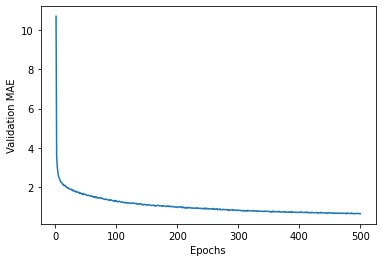

In [96]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')


결과 : 80번정도에서 가장 최적의 결과를 얻을수 있다